# **Non-Stationary Time Series data with ARIMA**



### **Introduction**

  Time Series data is a series of data points vary by time such as stock price, oil price, company's monthly productivity, etc. 


    
      


  Figure 1. Shown Time series data
  Source https://otexts.com/fpp2/time-plots.html 
    
  **Non-stationary time series** has unstable mean and variance, contains some patterns, i.e. cycles, trends or seasonality such as Stock price. In order to forecast Non-stationary time series, basically it should be adjusted or transformed to stationary before input to ML model or statistic method for prediction.


**ARIMA** is one of most popular statistical model used on time series data.
It is combination of two models, the Auto-Regressive model (AR) and the Moving Average model (MA), both models use past values (lags) to forecast future values.
To make time series stationary, differencing is simply method by subtracting the previous value from the current value in the time series.
the magic value that “I” represents is the number of times this is done to achieve stationarity.

The parameters of the ARIMA model are defined as follows:
p: The number of lag observations in the model. Use for "AR"
d: The number of times that the raw observations are differenced to make it stationary. Use for "I"
q: The size of the moving average window. Use for "MA"


**Let's forecast Bitcoin price by using ARIMA**g

**STEPS**


1.   **Install and import packages**
2.   **Import data**
3.   **Visualize data**
4.   **Forecast by using whole data**
5.   **Forecast by using significant data**
6.   **Compare performance and conclusion**
7.   **References**









***Import the packages***

In [1]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.1 MB/s 
     |████████████████████████████████| 9.8 MB 55.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [30]:
#mathematical operations
import numpy as np
from numpy.random import seed
from numpy.random import normal
import math
import scipy as sp
from scipy.stats import norm

#data handling
import pandas as pd
from pandas import read_csv
import pandas.util.testing as tm
from sklearn.model_selection import train_test_split

# visualization plotting
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
sns.set()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

#dataframe index manipulations
from datetime import datetime

#muting unnecessary warnings if needed
import warnings

In [31]:
# machine learning and statistical methods


import pmdarima as pm
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro


***Import Data***

#### Mount drive

In [33]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading bitcoin price from drive

In [36]:
#loading raw data
path = "/content/drive/MyDrive/DL_03/btcthb_daily_5000n_bar.csv"
df=pd.read_csv(path)


In [37]:
df.describe()

,open,high,low,close,volume
count,1.418000e+03,1.418000e+03,1.418000e+03,1.418000e+03,1418.000000
mean,6.606454e+05,6.773529e+05,6.430902e+05,6.615554e+05,228.004336
std,6.124973e+05,6.272574e+05,5.958411e+05,6.127975e+05,230.638628
min,1.049140e+05,1.064990e+05,1.000000e+05,1.049040e+05,0.231786
25%,2.225522e+05,2.283148e+05,2.185000e+05,2.227080e+05,52.752029
50%,3.045077e+05,3.100000e+05,2.999995e+05,3.042034e+05,180.032792
75%,1.220500e+06,1.259775e+06,1.150392e+06,1.222300e+06,320.447586
max,2.272000e+06,2.285500e+06,2.215000e+06,2.272000e+06,2280.701960


In [39]:
# Get only datetime , close column 
df1 =df[['datetime', 'close']]
df1

,datetime,close
0,2018-05-09,295950.00
1,2018-05-10,299000.00
2,2018-05-11,270150.00
3,2018-05-12,280000.00
4,2018-05-13,277200.00
...,...,...
1413,2022-03-22,1425003.55
1414,2022-03-23,1431300.00
1415,2022-03-24,1478744.95
1416,2022-03-25,1492999.50


In [41]:
# Change datetime column to index 
from datetime import datetime
con=df1['datetime']
df1['datetime']=pd.to_datetime(df1['datetime'])
df1.set_index('datetime', inplace=True)
#check datatype of index
df1.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


DatetimeIndex(['2018-05-09', '2018-05-10', '2018-05-11', '2018-05-12',
               '2018-05-13', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26'],
              dtype='datetime64[ns]', name='datetime', length=1418, freq=None)

In [50]:
# Split Train : Test data 
# Use the last 30 days price for Test data
# The rest is for Train data

train_df = df1.iloc[:1389]
test_df = df1.iloc[1389:]

###Visualize data

Let's see how data look like

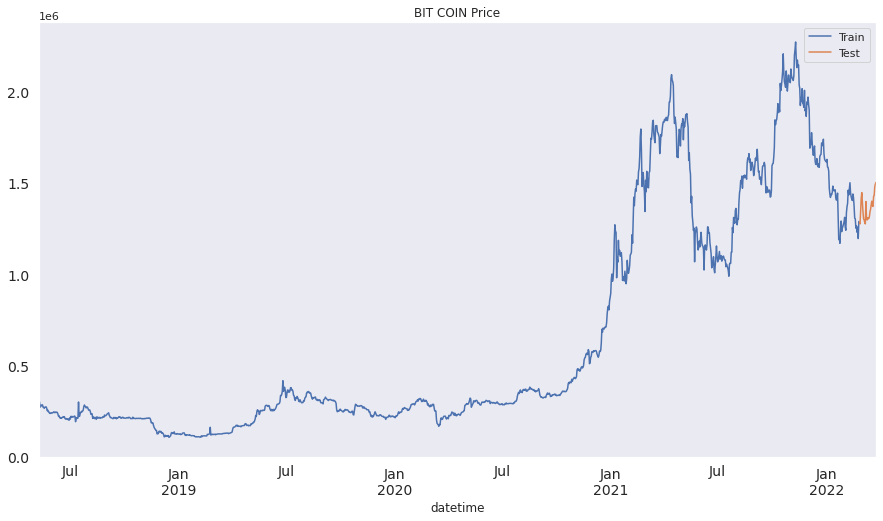

In [51]:
train_df.close.plot(figsize=(15,8), title= 'BIT COIN Price', fontsize=14, label='Train')
test_df.close.plot(figsize=(15,8), title= 'BIT COIN Price', fontsize=14, label='Test')
plt.legend()
plt.grid()
plt.show()

From original data . It obvious non stationary
But in case of we need to forecast we need to make it stationary

Fortunately we have ARIMA model which able to adjust non stationary to be nearest stationary
Let's use ARIMA

**Let use Auto Arima for finding the best model.**


In [52]:
model_arima = auto_arima(train_df['close'], trace=True, error_action='ignore', suppress_warnings=True)
model_arima.fit(train_df['close'])
forecast_arima = model_arima.predict(n_periods=len(test_df))
arima = pd.DataFrame(forecast_arima,index = test_df['close'].index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=32768.219, Time=1.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32783.555, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32781.667, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32782.128, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32782.227, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=32767.059, Time=0.94 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=32779.025, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32768.074, Time=0.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=32766.485, Time=0.92 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=32768.186, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=32768.429, Time=2.25 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=32756.902, Time=1.01 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=32761.998, Time=0.40 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=32740.465, Time=1.98 sec
 ARIMA(3,1,4)(0,0,0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1389
Model:               SARIMAX(4, 1, 4)   Log Likelihood              -16358.940
Date:                Tue, 29 Mar 2022   AIC                          32735.881
Time:                        14:51:23   BIC                          32783.001
Sample:                             0   HQIC                         32753.503
                               - 1389                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8324      0.092      9.097      0.000       0.653       1.012
ar.L2         -0.3988      0.091     -4.380      0.000      -0.577      -0.220
ar.L3         -0.4364      0.090     -4.825      0.0

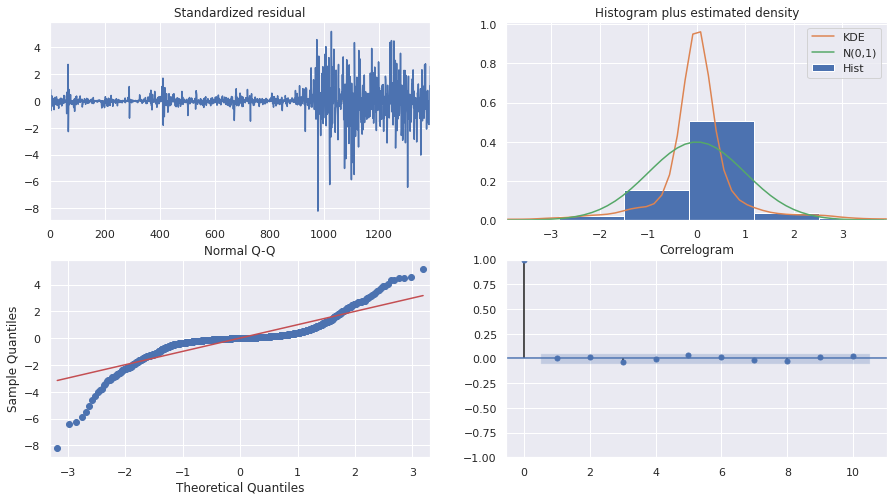

In [53]:
# Show the summary of best model from AUTO ARIMA
print(model_arima.summary())
model_arima.plot_diagnostics(figsize=(15,8))
plt.show()

Let's confirm diagnostic result whether data stationary or not ?

**Top left**: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

**Top Right**: The density plot looks normal distribution with mean zero.

**Bottom left**: The distribution is skewd due to some dots did not fall perfectly in line with the red line. 

**Bottom Right**: The Correlogram, ACF plot shows the residual errors are not autocorrelated. 

Overall , the model already adjusted data to stationary and forecast, but it is not so good.

In [54]:
# report performance
mse = mean_squared_error(test_df, arima)
print('MSE: '+str(mse))

rmse = math.sqrt(mean_squared_error(test_df, arima))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(test_df['close'] - arima['Prediction'])/test_df['close'])
print('MAPE: '+str(mape))

MSE: 9725774697.70329
RMSE: 98619.3424116349
MAPE: 0.052853723208307724


With MAPE = 5.28 % that mean model has accuracy = 94.72%\
**Lets see the result on graph**

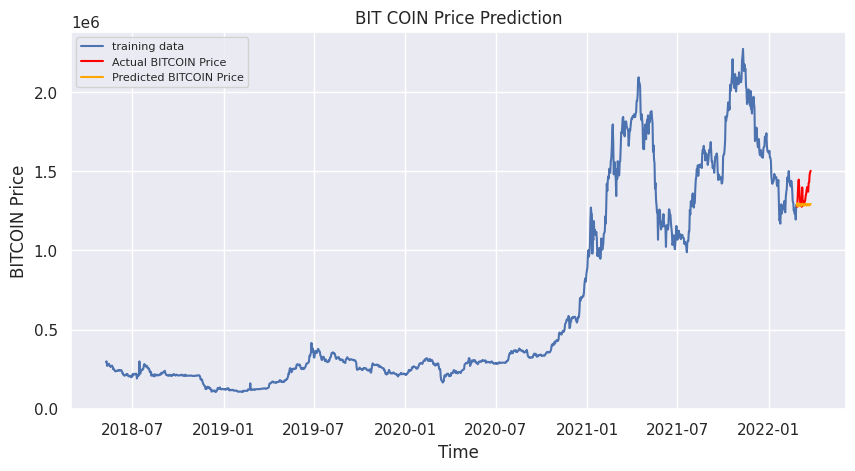

In [55]:

# Make as pandas series
fc_arima = pd.Series(arima['Prediction'], index=test_df.index)
# lower_series = pd.Series(conf[:, 0], index=test_df.index)
# upper_series = pd.Series(conf[:, 1], index=test_df.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_df, label='training data')
plt.plot(test_df, color = 'red', label='Actual BITCOIN Price')
plt.plot(fc_arima, color = 'orange',label='Predicted BITCOIN Price')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.10)
plt.title('BIT COIN Price Prediction')
plt.xlabel('Time')
plt.ylabel('BITCOIN Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

**Jump to significant data period**

As we can see , the price was changed significantly at beginning of Jan 2021\
Let's use these data onward instead of whole data

In [56]:
# Create new Train set
# Start from Jan 2021
# Test set remain same as previous

train_df2 = df1.iloc[952:1389]
test_df2 = df1.iloc[1389:]


**Visualize new data**

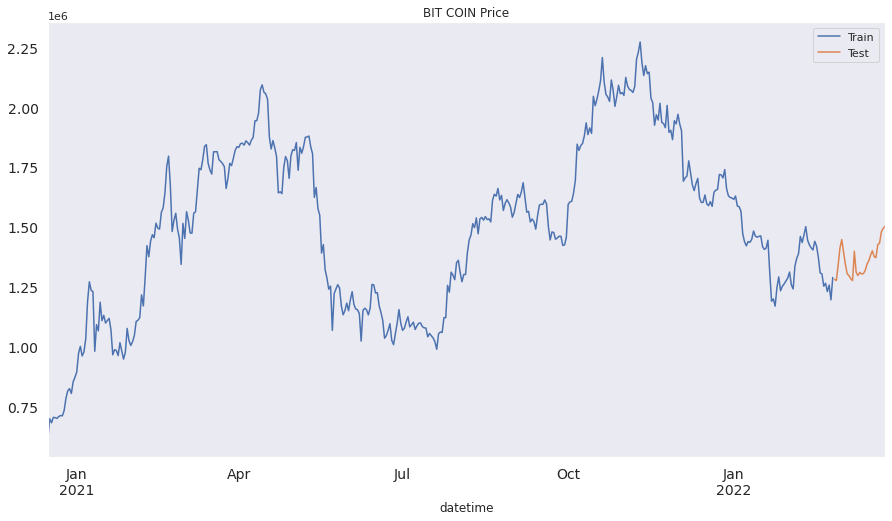

In [57]:
train_df2.close.plot(figsize=(15,8), title= 'BIT COIN Price', fontsize=14, label='Train')
test_df2.close.plot(figsize=(15,8), title= 'BIT COIN Price', fontsize=14, label='Test')
plt.legend()
plt.grid()
plt.show()

**It looks like a little multiplicative trend**\
This will be adjusted by AUTO ARIMA to make it stationary\


In [58]:
model_arima2 = auto_arima(train_df2['close'], trace=True, error_action='ignore', suppress_warnings=True)
model_arima2.fit(train_df2['close'])
forecast_arima2 = model_arima2.predict(n_periods=len(test_df2))
arima2 = pd.DataFrame(forecast_arima2,index = test_df2['close'].index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10781.345, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10779.285, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10781.128, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10781.144, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10777.609, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10779.405, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.721 seconds


**Best model is ARIMA(0,1,0)**\
It means data was differencing 1 time for making stationary

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  437
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5387.805
Date:                Tue, 29 Mar 2022   AIC                          10777.609
Time:                        14:52:53   BIC                          10781.687
Sample:                             0   HQIC                         10779.218
                                - 437                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.162e+09   1.51e+08     20.923      0.000    2.87e+09    3.46e+09
Ljung-Box (L1) (Q):                   1.37   Jarque-Bera (JB):                85.74
Prob(Q):                              0.24   Pr

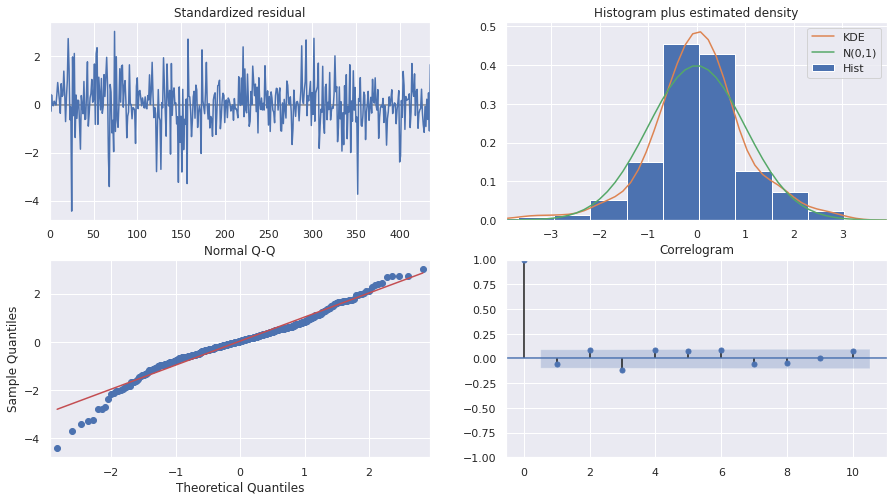

In [59]:
print(model_arima2.summary())
model_arima2.plot_diagnostics(figsize=(15,8))
plt.show()

It looks much better than previous result

**Top left:** The residual errors seem to fluctuate around a mean of zero and have a constant variance. 

**Top Right:** The density plot looks good normal distribution with mean zero.

**Bottom left:** The distribution is a little skewd due to some dots did not fall perfectly in line with the red line but better than previous result.

**Bottom Right:** The Correlogram, ACF plot shows there is no residual errors autocorrelated. \

Overall , the model looks good.

In [60]:
# report performance
mse = mean_squared_error(test_df2, arima2)
print('MSE: '+str(mse))

rmse = math.sqrt(mean_squared_error(test_df2, arima2))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(test_df2['close'] - arima2['Prediction'])/test_df2['close'])
print('MAPE: '+str(mape))

MSE: 9634641032.254011
RMSE: 98156.20730373607
MAPE: 0.052826568023362185


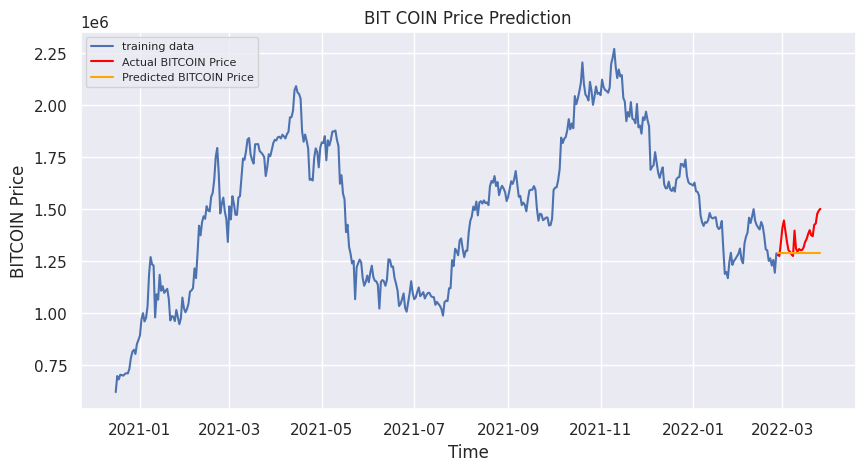

In [61]:
# Make as pandas series
fc_arima2 = pd.Series(arima2['Prediction'], index=test_df2.index)
# lower_series = pd.Series(conf[:, 0], index=test_df.index)
# upper_series = pd.Series(conf[:, 1], index=test_df.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_df2, label='training data')
plt.plot(test_df2, color = 'red', label='Actual BITCOIN Price')
plt.plot(fc_arima2, color = 'orange',label='Predicted BITCOIN Price')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.10)
plt.title('BIT COIN Price Prediction')
plt.xlabel('Time')
plt.ylabel('BITCOIN Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

###Conclusions
Forecasting accuracy result from using whole data and significant data is nearly same. \
It means ARIMA model can be used for Non-stationary data. \
But the accuracy is not so good. \
It means we absolutely unable to predict bitcoin price correctly.  

###References
Papers link \

ARIMA and Time Series forecast\
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

https://otexts.com/fpp2/time-plots.html



================================================================================